In [ ]:
# Assuming the dataset has these columns: 'Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)'
# First, load the dataset and preview the data
import pandas as pd
data = pd.read_csv('/content/Mall_Customers.csv')

# Preview the dataset
print(data.head())

# Encode categorical feature 'Gender' (Male = 0, Female = 1)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Select relevant features for clustering (including new features like 'Age' and 'Gender')
X = data[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


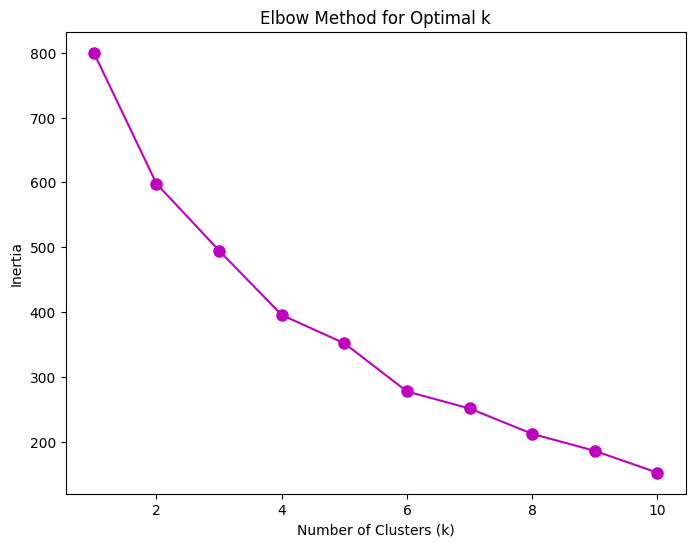

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)  # Test 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'mo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [6]:
# Set the optimal number of clusters (from the Elbow method)
optimal_k = 5  # Assuming the elbow was found at 5 clusters

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = y_kmeans


In [7]:
# Set the optimal number of clusters (assuming elbow method suggests 5)
optimal_k = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = y_kmeans


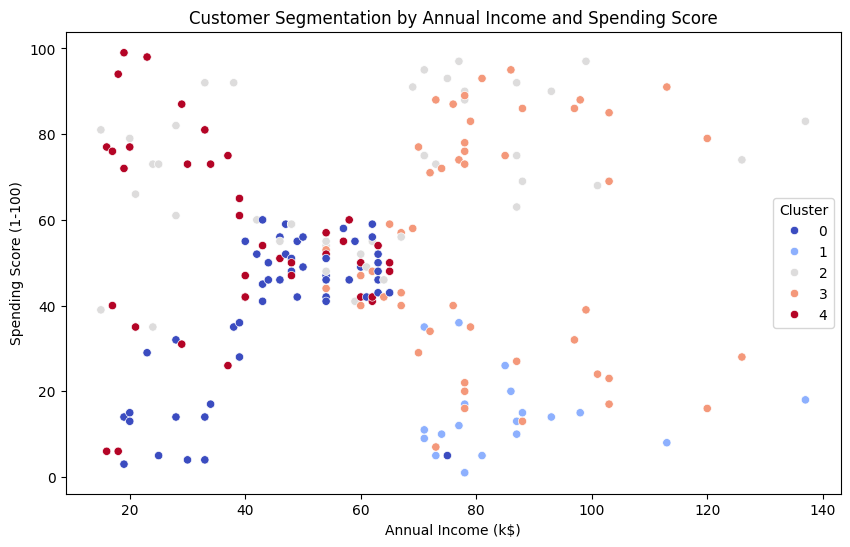

In [12]:
import seaborn as sns

# Visualize clusters using 'Annual Income' and 'Spending Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='coolwarm')
plt.title('Customer Segmentation by Annual Income and Spending Score')
plt.show()


In [9]:
# Group data by cluster and calculate the mean values of relevant features
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.490196  56.470588           46.098039   
1        159.500000  0.000000  39.500000           85.150000   
2        100.809524  0.000000  28.690476           60.904762   
3        151.510204  1.000000  37.897959           82.122449   
4         50.526316  1.000000  27.315789           38.842105   

         Spending Score (1-100)  
Cluster                          
0                     39.313725  
1                     14.050000  
2                     70.238095  
3                     54.448980  
4                     56.210526  


In [10]:
# Group data by cluster and calculate the mean values of only numeric columns
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.490196  56.470588           46.098039   
1        159.500000  0.000000  39.500000           85.150000   
2        100.809524  0.000000  28.690476           60.904762   
3        151.510204  1.000000  37.897959           82.122449   
4         50.526316  1.000000  27.315789           38.842105   

         Spending Score (1-100)  
Cluster                          
0                     39.313725  
1                     14.050000  
2                     70.238095  
3                     54.448980  
4                     56.210526  


In [11]:
# For numeric columns, calculate the mean
numeric_summary = data.groupby('Cluster').mean(numeric_only=True)

# For categorical columns (e.g., 'Gender'), calculate the mode (most frequent value)
categorical_summary = data.groupby('Cluster')['Gender'].agg(lambda x: x.mode()[0])

# Combine both summaries
cluster_summary = pd.concat([numeric_summary, categorical_summary], axis=1)

print(cluster_summary)



         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.490196  56.470588           46.098039   
1        159.500000  0.000000  39.500000           85.150000   
2        100.809524  0.000000  28.690476           60.904762   
3        151.510204  1.000000  37.897959           82.122449   
4         50.526316  1.000000  27.315789           38.842105   

         Spending Score (1-100)  Gender  
Cluster                                  
0                     39.313725       0  
1                     14.050000       0  
2                     70.238095       0  
3                     54.448980       1  
4                     56.210526       1  
